# Intro to Bootstrap

In [2]:
import sys
sys.path.append("../../PythonScripts")

In [3]:
from prereqs import *

now importing: 
1. numpy as np 
2. matplotlib.pyplot as plt
3. from scipy import stats




## Bootstrap 

Bootstrap methods are a class of Monte Carlo methods known as nonparametric Monte Carlo. Bootstrap methods in simple terms are methods of *resampling* observed data to estimate the CDF from which the observed data is supposed to have originate from. 

Suppose we observe *independent* samples $x_1, ..., x_n$ from pdf/pmf $f$, and whose CDF $F$ is unobservable. Well, given that $X = (x_1, ..., x_n)^T$ originates from $F$, we can use $X$ to generate the empirical CDF $F_n$ which is itself an estimate of $F$. 

$$
F_n \to F \text{ as } n \to \infty
$$

If we sample (with replacement) another set of $n$ observations from $F_n$, we will have $X^* = (x_1^*, ..., x_n^*)^T$. This new sample $X^*$ can then generate another empirical CDF, $F^*_n$ which is another estimate of $F$. 

That is, $F^*_n$ is a bootstrap estimator of $F$. We can continue this process of resampling with replacement to obtain samples $X^*_1,X^*_2, ..., X^*_B$ and $F^*_{n,1}, F^*_{n,2}, ..., F^*_{n,B}$.



## Bootstrap 

In addition to estimating the theoretical CDF $F$, there may be a statistic of interest $\theta$ (e.g. mean). We can use bootstrap methods to calculate an empirical distribution of $\theta$. 

From our original sample $X$ we can calculate estimate $\hat{\theta}$. Similarly, using the bootstrap samples we can also  calcualte estimates for $\theta$: $\hat{\theta}^*_1, ..., \hat{\theta}^*_B$.

We can also calculate Bias and make confidence intervals for our estimates.


## Bootstrap Algorithm 

A simple bootstrap algorithm for *independent* samples $X = (x_1, ..., x_n)^T$ is:

To generate *B* bootstrap samples, for *b* in 1, ..., *B* do

1. Sample $x_1, ..., x_n$ with replacement to create sample set $X^*_b$. Each observation $x_i$ has a probability of *1/n* of being in the new sample.

2. For $X^*_b$ calculate $\hat{\theta}^*_b$



## Bootstrap Example 

Calculate the bootstrap mean distribution for `mpg` from the `mtcars` R data set. You will need to pull the data set down from the web, so we will use pandas to do this.

If you don't have pandas install run: 
- `pip install pandas` or 
- `conda install pandas` (if you have Anaconda distribution)

In [4]:
import pandas as pd
mtcars = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/mtcars.csv", 
                     index_col = 0)
mtcars.head()
mpg = mtcars.mpg

In [5]:
from tqdm import tqdm ## for progress bar

n = mtcars.shape[0]
B = 10000 ## number of bootstrap samples
results = [] ## list to hold results
for i in tqdm(range(B)):
    i = np.random.choice(a = range(n), size = n, replace = True) ## sample with replacement
    tmp = mpg[i]
    thetaHat = np.mean(tmp)
    results.append(thetaHat)
   

100%|██████████| 10000/10000 [00:02<00:00, 3923.00it/s]


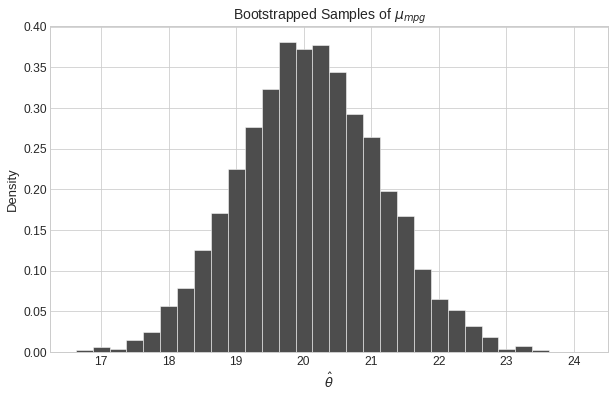

In [6]:
## histogram default to `doane` algorithm for bins, but here i set it to 30 to show more detail
hist(x = np.array(results), 
     title = r"Bootstrapped Samples of $\mu_{mpg}$", 
     xlabel = r"$\hat{\theta}$", bins = 30)


## Bootstrap Example | Precaution 

Before enbarking on resampling methods we must ask what variables are *iid* in order to determine a correct bootstrapping approach. 

Bootstrap methods are *not* a method of generating new data for, say, a regression setting when observed samples are low. 

In the above example, it is assumed that each observation in the `mpg` data set is indpendent and identically distributed from an unknown distribution $f$. 

However, if there were to have existed some autocorrelation structure (as exist in time-series data) then we would need to adjust our resampling methodology to account for this correlation. 

When dealing with time-series data, we will use a method called *block bootsrap*.


## Paired Bootstrapping 

Let's continue to work with the `mtcars` data set. Say we wanted to make inferences about the linear regression parameters.

If you don't have statsmodels install run:
- `pip install statsmodels` or
- `conda install statsmodels` (if you have Anaconda distribution)

In [7]:
import statsmodels.formula.api as smf

fit = smf.ols('mpg ~ wt + am', data=mtcars).fit() ## fit the model using R-like syntax
print(fit.summary()) ## print the summary output

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     44.17
Date:                Sun, 29 Oct 2017   Prob (F-statistic):           1.58e-09
Time:                        15:13:44   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      29   BIC:                             170.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.3216      3.055     12.218      0.0

In [8]:
confint = fit.conf_int() ## get confidence intervals for parameter estimates
confint.columns = ['2.5%', '97.5%'] ## rename columns, otherwise they are [0, 1]
confint['coefficients'] = fit.params ## get parameter estimates
print(confint)


                2.5%      97.5%  coefficients
Intercept  31.074114  43.568989     37.321551
wt         -6.964951  -3.740672     -5.352811
am         -3.184815   3.137584     -0.023615


## Visualizing the data

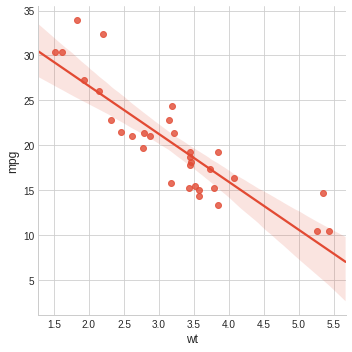

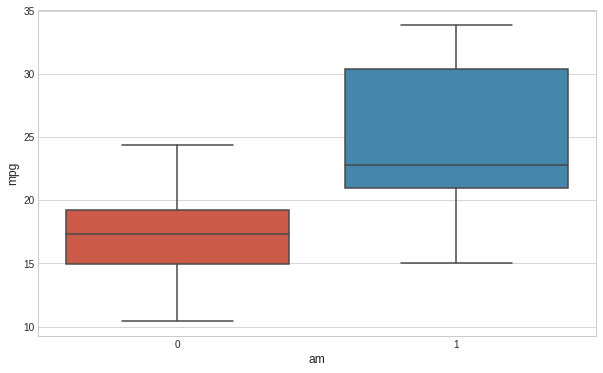

In [9]:
import seaborn as sns
g = sns.lmplot(x="wt", y="mpg", data=mtcars)
plt.show()

h = sns.boxplot(x="am", y="mpg", data=mtcars)
plt.show()

In [10]:
## save coefficients
#print(fit.params)
beta_int = fit.params['Intercept']
beta_wt = fit.params['wt']
beta_am = fit.params['am']

B = 10000 ## number of bootstrap samples

results = [] ## list to hold results


In [11]:

## begin bootstrap for-loop
for b in tqdm(range(B)):
    i = np.random.choice(a = range(n), replace=True, size = n) ## sample indices
    temp = mtcars.iloc[i,:] ## temp data set
    temp_model = fit = smf.ols('mpg ~ wt + am', data=temp).fit()  ## train model
    coeff = temp_model.params ## get coefficients
    results.append(coeff) ## save coefficients in matrix


100%|██████████| 10000/10000 [00:41<00:00, 239.38it/s]


In [12]:
bootdf = pd.DataFrame(results)
bootdf.describe()

,Intercept,wt,am
count,10000.000000,10000.000000,10000.000000
mean,37.732688,-5.485670,-0.113059
std,3.711924,1.035706,1.615137
min,26.653639,-11.253038,-6.693268
25%,35.191458,-6.034938,-1.210018
50%,37.340940,-5.354709,-0.182731
75%,39.827694,-4.773013,0.897327
max,57.830707,-2.613406,8.807758


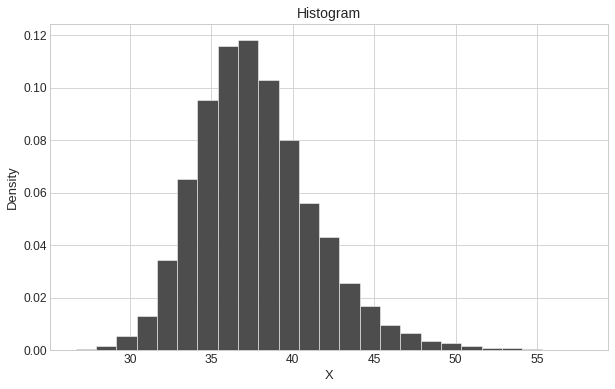

In [13]:
hist(bootdf['Intercept'], bins = 25)

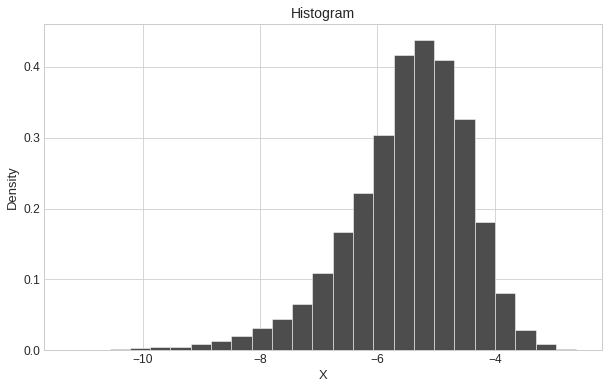

In [14]:
hist(bootdf['wt'], bins = 25)

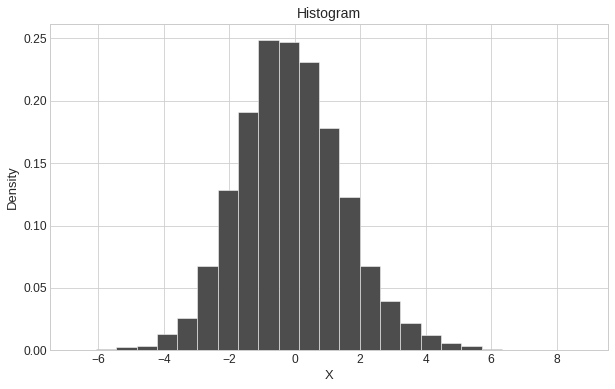

In [15]:
hist(bootdf['am'], bins = 25)

## Paired Bootstrapping 


Now we can estimate bias for each parameter estimate. Define Bias as $Bias(\theta) = E[\theta^*] - \theta$, where in our scenario we have $Bias(\hat\theta) = E[\hat\theta^*] - \hat\theta$. Our bootstrap bias corrected estimates are then $\hat\theta_{BC} = \hat\theta - Bias(\hat\theta)$.



In [16]:
bias_int = np.mean(bootdf['Intercept'] - beta_int)
print(bias_int)

bias_wt = np.mean(bootdf['wt'] - beta_wt)
print(bias_wt)

bias_am = np.mean(bootdf['am'] - beta_am)
print(bias_am)

0.411136788367
-0.132858531495
-0.0894440930348


In [17]:

## incorportate our bias into the coefficients
## we now have bias corrected coefficients

intercept = beta_int - bias_int
print(intercept)

wt = beta_wt - bias_wt
print(wt)

am = beta_am - bias_am
print(am)



36.9104145218
-5.21995291531
0.0658288733721


## Paired Bootstrapping 



Another method for applying the bootstrap approach to building an empirical distribution of $\hat\beta$ is to bootstrap the residuals. However, bootstrapping the cases is often more robust when there are doubts about a constant variance for the residuals, such as heteroskedasticity. Additionally, paired bootstrap more resembles the original data generation mechanisms.

